In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

1. Моделировать выборку из а) распределения exp(1) б) распределения Коши с помощью метода
обратной функции. Построить гистограмму, сравнить со встроенным методом.

Количество элементов выборки:  1000


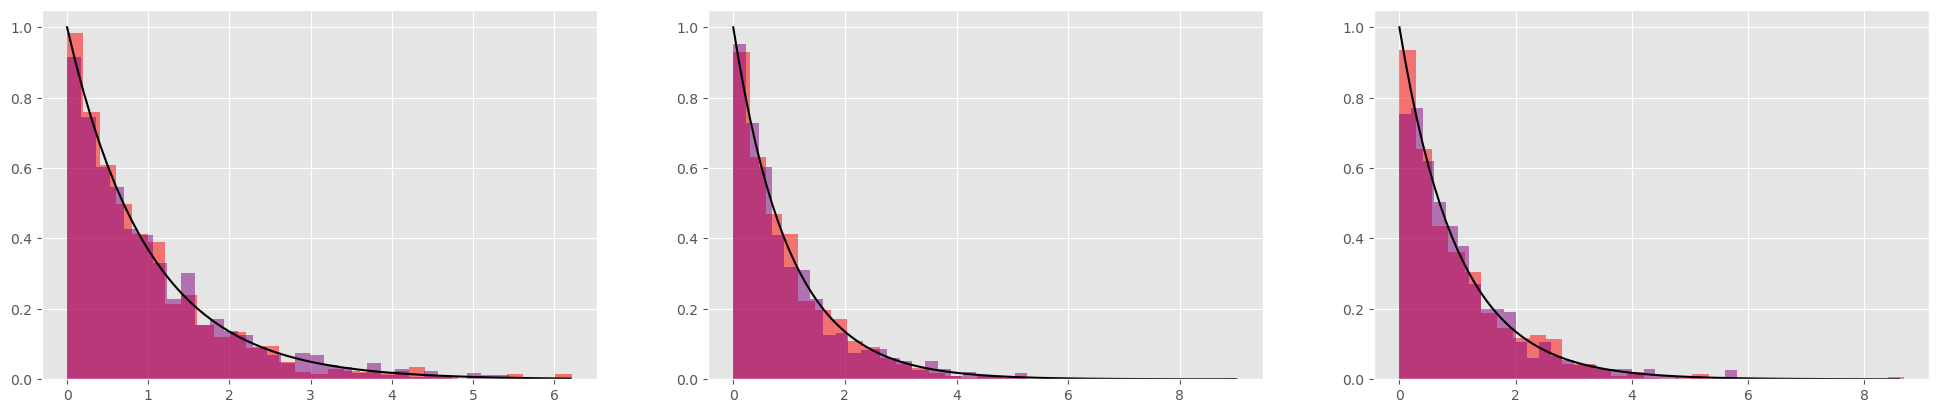

In [72]:
# a)

n = int(input("Количество элементов выборки: "))

plt.subplots_adjust(left = 0.01, right = 4)

for i in range(1, 4):
    plt.subplot(1, 4, i)
    Y = np.random.uniform(0, 1, n)
    Y = Y[Y > 0] #Y = 0 - прообраз -Inf, но X >= 0
    X = -np.log(1-Y)
    plt.hist(X, density=True, color='red', alpha=0.5, bins=int(n**0.5))

    Z = np.random.exponential(1, n)
    plt.hist(Z, density=True, color='purple', alpha=0.5, bins=int(n**0.5))
    
    coor_x = np.arange(0, max(max(Z), max(X)), 0.1)
    plt.plot(coor_x, sc.stats.expon.pdf(coor_x), color='black')


 1000


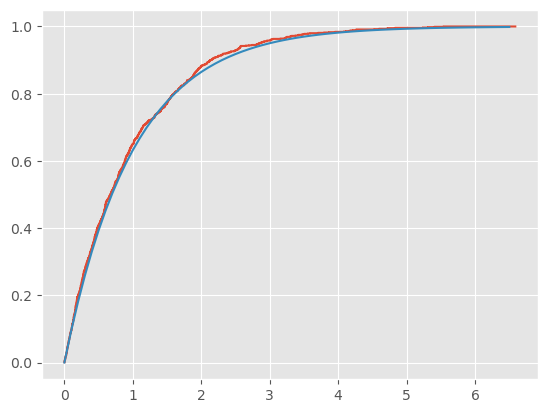

In [73]:
#а) Построим Эмперическую функцию распределения EXP по выборке и сравним с функией распределения
from statsmodels.distributions.empirical_distribution import ECDF

n = int(input())

Y = np.random.uniform(0, 1, n)
Y = Y[Y > 0] #Y = 0 - прообраз -Inf, но X >= 0
X = -np.log(1-Y)
    
ecdf = ECDF(X)
plt.step(ecdf.x, ecdf.y, label="ECDF")

coor = np.arange(min(X), max(X), 0.1)
plt.plot(coor, sc.stats.expon.cdf(coor))

Количество элементов выборки:  1000


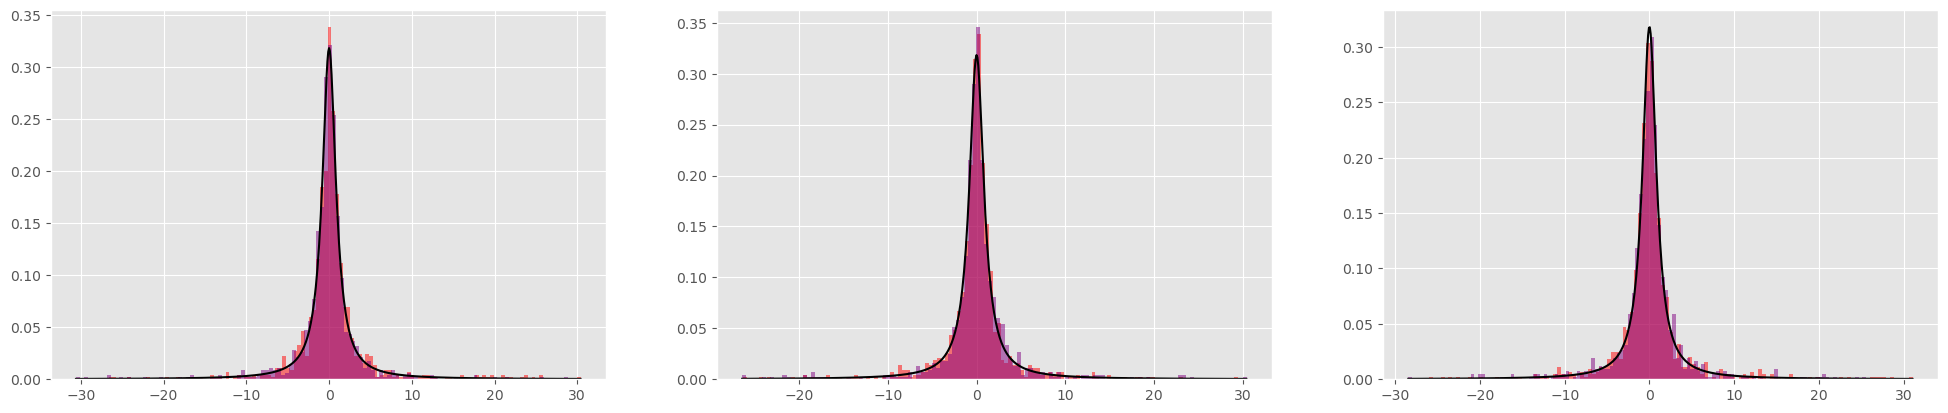

In [94]:
#б)

n = int(input("Количество элементов выборки: "))

plt.subplots_adjust(left = 0.01, right = 4)

for i in range(1, 4):
    plt.subplot(1, 4, i)
    
    Y = np.random.uniform(0, 1, n)
    Y = Y[Y > 0] #Y = 0 - прообраз -Inf, но X >= 0
    X = np.tan(np.pi * Y - np.pi/2)
    
    #Рассмотрим элементы в заданном диапазоне
    X = X[(-n**0.5 <= X) & (X <= n**0.5)]
    plt.hist(X, density=True, color='red', alpha=0.5, bins=int(n**0.7))

    Z = np.random.standard_cauchy(n)
    
    #Рассмотрим элементы в заданном диапазоне
    Z = Z[(-n**0.5 <= Z) & (Z <= n**0.5)]
    plt.hist(Z, density=True, color='purple', alpha=0.5, bins=int(n**0.7))
    
    coor_x = np.arange(min(min(Z), min(X)), max(max(Z), max(X)), 0.1)
    plt.plot(coor_x, sc.stats.cauchy.pdf(coor_x), color='black')
    


Количество элементов выборки:  333


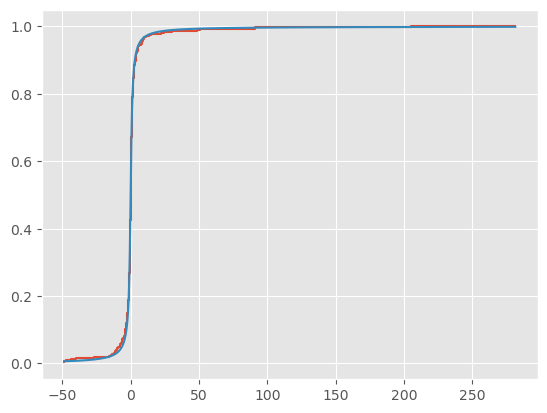

In [95]:
#б) Построим Эмперическую функцию распределения Cauchy по выборке и сравним с функией распределения
from statsmodels.distributions.empirical_distribution import ECDF

n = int(input("Количество элементов выборки: "))

Y = np.random.uniform(0, 1, n)
Y = Y[Y > 0] #Y = 0 - прообраз -Inf, но X >= 0
X = np.tan(np.pi * Y - np.pi/2)

ecdf = ECDF(X)
plt.step(ecdf.x, ecdf.y, label="ECDF")

coor = np.arange(min(X), max(X), 0.1)
plt.plot(coor, sc.stats.cauchy.cdf(coor))

2. Моделировать выборку из равномерного распределения на единичном круге: а) методом выбора с
отклонениями, б)* методом условных распределений, в) с помощью полярных координат.

 1000


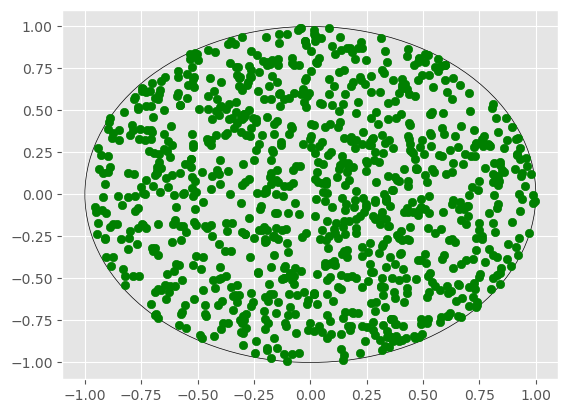

In [36]:
# (X, Y), где X, Y - нез. R[-1, 1], 
# - равномерное распределение в единичном квадрате, C = 4/pi, 
# тогда в круге достигается равенство f/g = c, за его пределеами нер-во.

n = int(input())
X = []
Y = []

for i in range(n):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    while x**2 + y**2 >= 1:
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
    X.append(x)
    Y.append(y)
    
unit_circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_patch(unit_circle)
plt.scatter(X, Y, color='green')

 5000


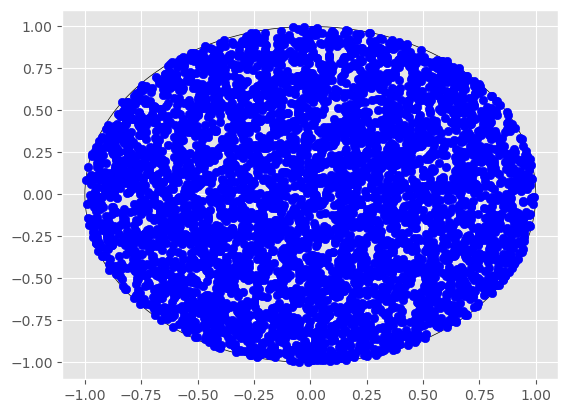

In [8]:
#Метод условных распределений
def x_density(x):
    if x >= -1 and x <= 1:
        return 2/np.pi * (1-x**2)**0.5
    return 0

n = int(input())
X = []
Y = []
for i in range(n):
    #Генерируем x с плотностью, описанной выше
    #Метод выбора с отклонением
    x = np.random.uniform(-1, 1)
    c = 4/np.pi
    bern = np.random.uniform(0, 1)
    while bern >= x_density(x)/(c * 1/2):
        x = np.random.uniform(-1, 1)
        c = 4/np.pi
        bern = np.random.uniform(0, 1)
    X.append(x)
    
    #Условная плотность Y|X ~ R[-sqrt(1-x^2), sqrt(1-x^2)]
    y = np.random.uniform(-(1-x**2)**0.5, (1-x**2)**0.5)
    Y.append(y)
    
unit_circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_patch(unit_circle)
plt.scatter(X, Y, color='blue')

 1000


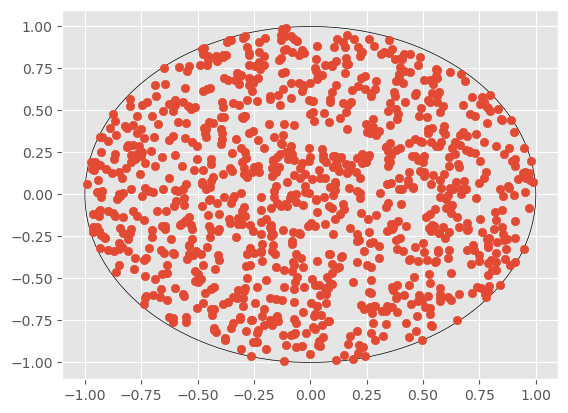

In [31]:
#через полярные координаты 2*r/2*pi I(r из [0, 1], phi из [0, 2pi]
n = int(input())
R = []
Phi = []
for i in range(n):
    phi = np.random.uniform(0, 2*np.pi)
    r = np.random.uniform(0, 1)
    r = r**0.5
    R.append(r)
    Phi.append(phi)

R = np.array(R)
Phi = np.array(Phi)

unit_circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_patch(unit_circle)
plt.scatter(R*np.cos(Phi), R*np.sin(Phi))

3. Моделировать выборку с плотностью а) Лапласа б) exp(−x)/2, x > 0 и exp(2x), x < 0. Построить
гистограмму. (Использовать смеси распределений.)

Введите размер выборки:  500


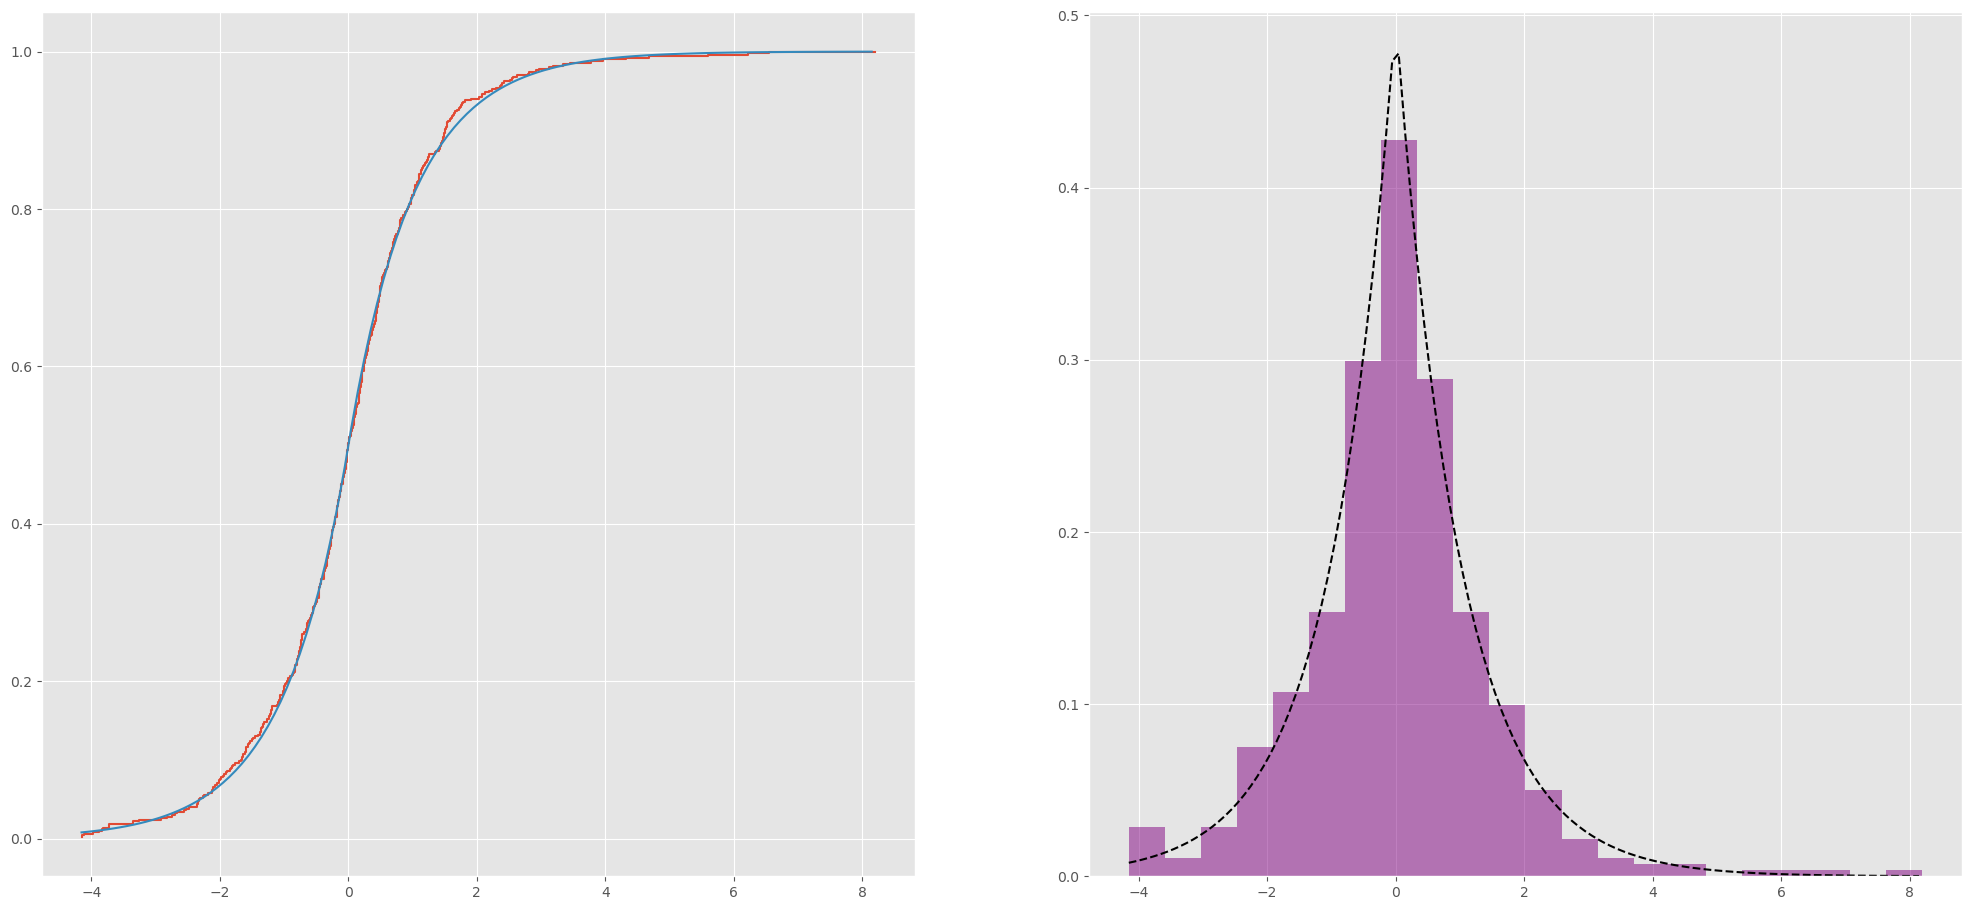

In [5]:
#a)
n = int(input("Введите размер выборки: "))

X = []

plt.subplots_adjust(top=2.8, bottom=1, left=1, right=4)


for i in range(n):
    bern = np.random.binomial(1, 1/2)
    y = np.random.uniform(0, 1)
    if bern == 1:
        X.append(-np.log(y))
    else:
        X.append(np.log(y))
        
X = np.array(X)

#ECDF
plt.subplot(1, 2, 1)
ecdf = ECDF(X)
plt.step(ecdf.x, ecdf.y, label="ECDF")

coor = np.arange(min(X), max(X), 0.1)
plt.plot(coor, sc.stats.laplace.cdf(coor))

plt.subplot(1, 2, 2)
plt.hist(X, bins=int(n**0.5), density=True, color='purple', alpha=0.5)
plt.plot(coor, sc.stats.laplace.pdf(coor), '--', color='black')

Введите размер выборки:  10000


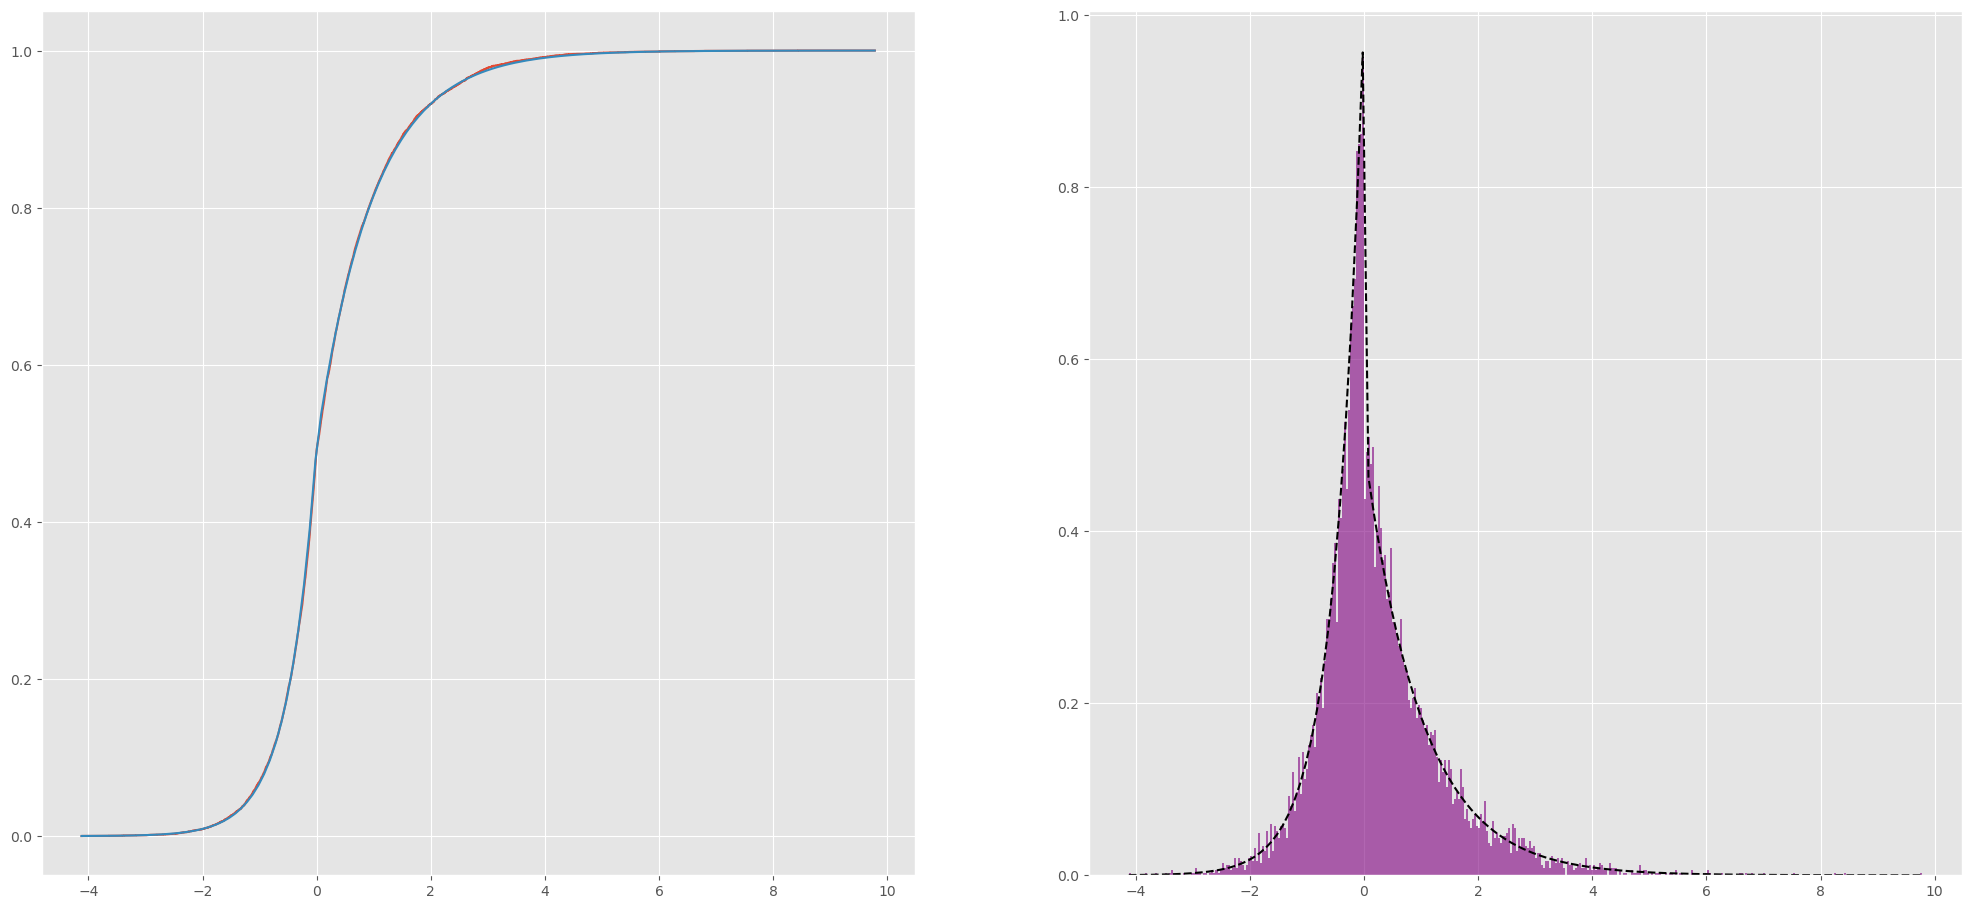

In [170]:
 #б)
n = int(input("Введите размер выборки: "))

plt.subplots_adjust(top=2.8, bottom=1, left=1, right=4)

X = []

for  i in range(n):
    #Генерация Bern(1/2)
    r = np.random.uniform(0, 1)
    if r >= 0.5:
        r = 1
    else:
        r = 0
    
    #Генерация нужного exp
    y = np.random.uniform(0, 1)
    if r == 0:
        x = 1/2*np.log(y)
    else:
        x = -np.log(1 - y)
    X.append(x)
    
X = np.array(X)

#сравним ECDF с функцией распределения
plt.subplot(1, 2, 1)
ecdf = ECDF(X)
plt.step(ecdf.x, ecdf.y, label="ECDF")

coor_x = np.arange(min(X), max(X), 0.1)
coor_y = []
for elem in coor_x:
    if elem < 0:
        coor_y.append(1/2*np.exp(2*elem))
    else:
        #В x = 0 скачок на 1/2
        coor_y.append(1 - 1/2*np.exp(-elem))
plt.plot(coor_x, coor_y)

plt.subplot(1, 2, 2)
plt.hist(X, bins=int(n**0.65), density=True, color='purple', alpha=0.6)

coor_x = np.arange(min(X), max(X), 0.1)
coor_y = []
for elem in coor_x:
    if elem < 0:
        coor_y.append(np.exp(2*elem))
    else:
        #В x = 0 скачок на 1/2
        coor_y.append(1/2*np.exp(-elem))
plt.plot(coor_x, coor_y, '--', color='black')

In [ ]:
#в)

T = np.arange(0, 1, 0.01)
for n in N:
    Y = []
    for t in T:
        ans = 0
        for x in range(0, n+1):
            if sc.stats.beta.ppf(0.5, x+1, n-x+1) <= t:
                ans += (t - sc.stats.beta.ppf(0.5, x+1, n-x+1)) * sc.stats.binom.pmf(x, n, t, loc=0)
            else:
                ans -= (t - sc.stats.beta.ppf(0.5, x+1, n-x+1)) * sc.stats.binom.pmf(x, n, t, loc=0)
        Y.append(ans)
    plt.plot(T, Y, label=str(n))
    
plt.legend(loc='best')

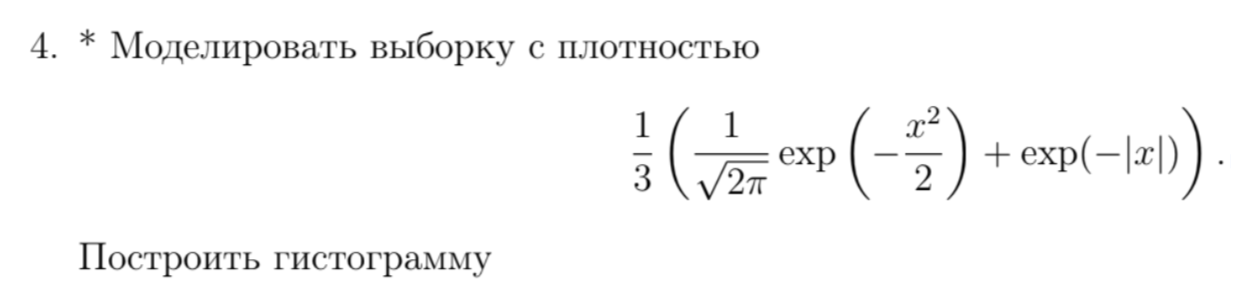


In [4]:
#Генератор случайного числа с распр. Лапласа
def laplace_random():
    y = np.random.uniform(0, 1)
    if y < 0.5:
        x = np.log(2*y)
    else:
        x = -np.log(2*(1-y))
    return x

In [11]:
#Генератор случайного числа с Нормальным распр. - 5б)
def normal_random():
    x = laplace_random()
    bern = np.random.uniform(0, 1)
    while bern >= sc.stats.norm.pdf(x)/((2*np.exp(1)/np.pi)**0.5 * sc.stats.laplace.pdf(x)):
        x = laplace_random()
        bern = np.random.uniform()
    return x

Кол-во элементов в выборке:  100000


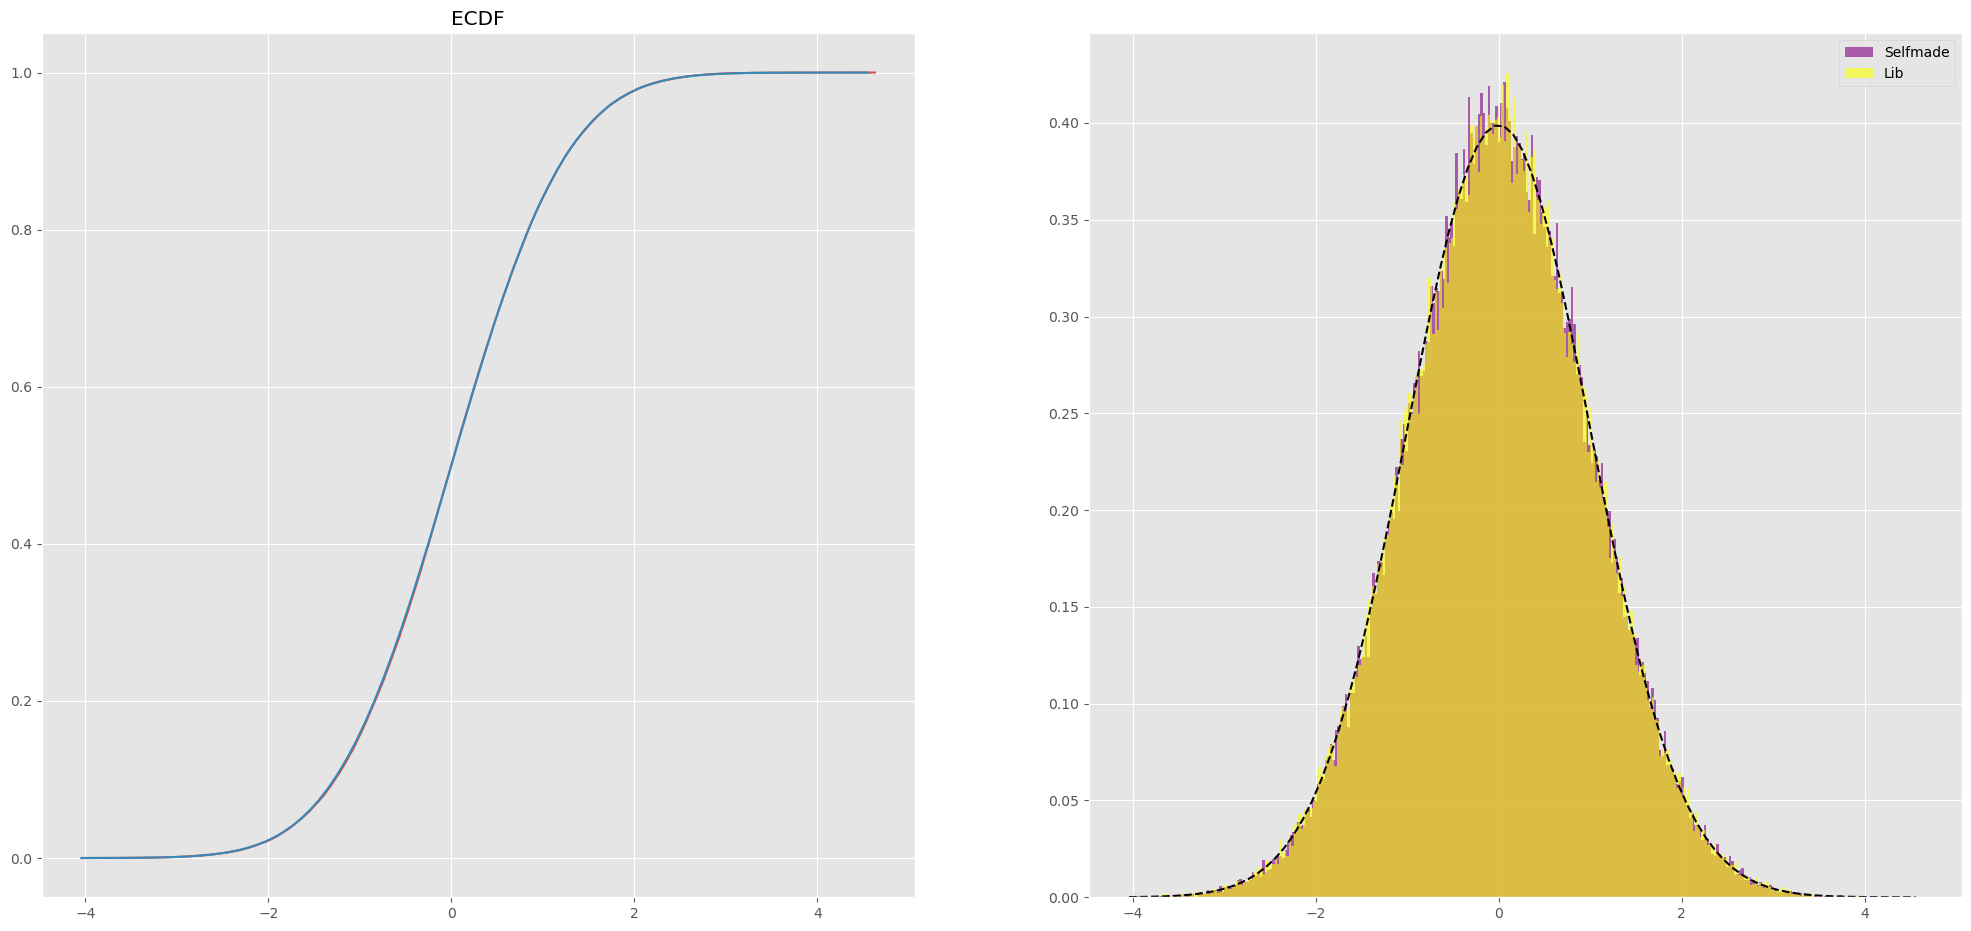

In [14]:
n = int(input("Кол-во элементов в выборке: "))

#Сравнение генераторов
plt.subplots_adjust(top=2.8, bottom=1, left=1, right=4)

#Собственная реализация
plt.subplot(1, 2, 1)

X = [normal_random() for i in range(n)]
ecdf = ECDF(X)
plt.step(ecdf.x, ecdf.y, label="ECDF")

coor = np.arange(min(X), max(X), 0.1)
plt.plot(coor, sc.stats.norm.cdf(coor))
plt.title('ECDF')


#Готовая реализация из библиотеки
plt.subplot(1, 2, 2)

plt.hist(X, density=True, color='purple', bins=int(n**0.5), alpha=0.6, label="Selfmade")

Z = np.random.normal(0, 1, n)
plt.hist(Z, density=True, color='yellow', bins=int(n**0.5), alpha=0.6, label="Lib")

plt.plot(coor, sc.stats.norm.pdf(coor, 0, 1), '--', color='black')

plt.legend(loc="best")

Введите размер выборки:  10000


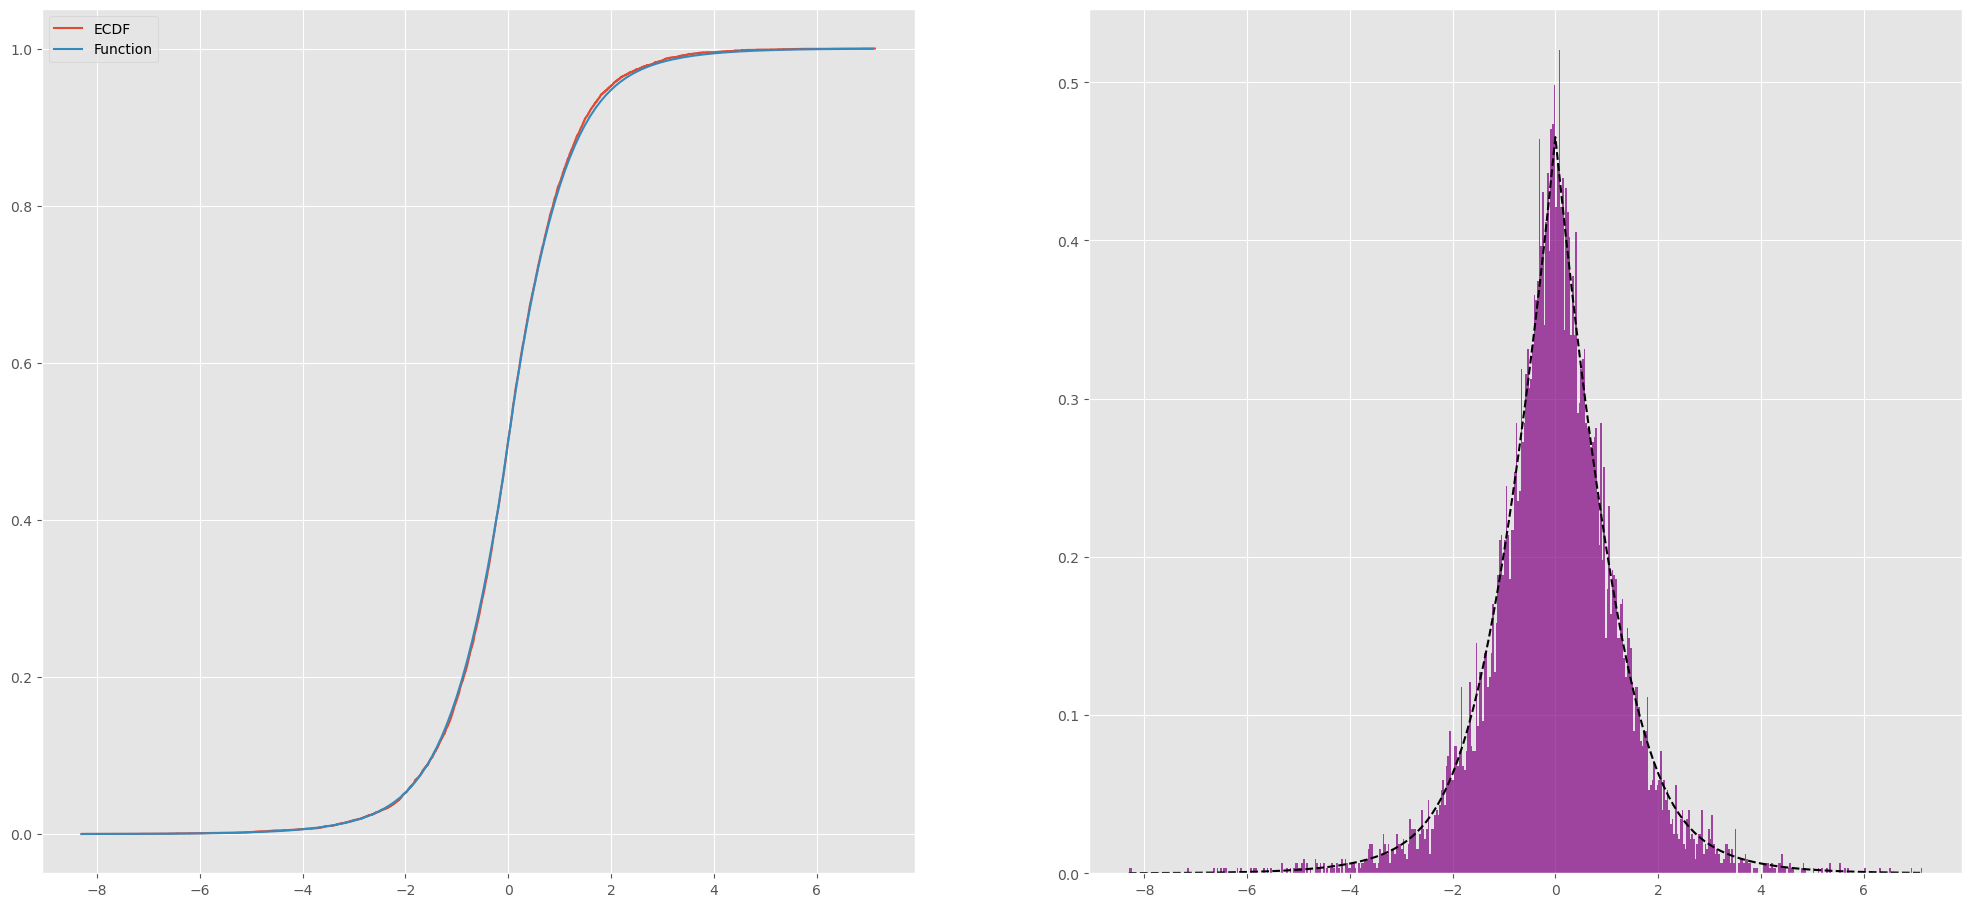

In [161]:
#c p=1/3 - N(0,1), 1-p=2/3 - Laplace
n = int(input("Введите размер выборки: "))
X = []
for i in range(n):
    bern = np.random.uniform(0, 1)
    if bern <= 1/3:
        X.append(normal_random())
    else:
        X.append(laplace_random())
X = np.array(X)

coor_x = np.arange(min(X), max(X), 0.1)
plt.subplots_adjust(top=2.8, bottom=1, left=1, right=4)

#Эмпирическая функция распр.
plt.subplot(1, 2, 1)
ecdf = ECDF(X)
plt.step(ecdf.x, ecdf.y, label="ECDF")
plt.plot(coor_x, 1/3*sc.stats.norm.cdf(coor_x) + 2/3*sc.stats.laplace.cdf(coor_x), label='Function')

plt.legend(loc="best")

#Гистограмма
plt.subplot(1, 2, 2)
plt.hist(X, bins=int(n**0.67), density=True, color='purple', alpha=0.7)
coor_y = [1/3*sc.stats.norm.pdf(elem) + 2/3*sc.stats.laplace.pdf(elem) for elem in coor_x] 
plt.plot(coor_x, coor_y, '--', color='black')        

5. Смоделировать с помощью алгоритма Acceptance-Rejection выборку из а) треугольного распределения (c плотностью (1 − |x|) I(x ∈ [−1, 1])); 
б)* нормального распределения с помощью распределения Лапласа.

In [1]:
#а)
# f/g <= 2 = c

def func(x):
    if x <= 0:
        return (1+x)/2
    else:
        return (1-x)/2

n = int(input("Введите размер выборки: "))
X = []

for i in range(n):
    bern = np.random.uniform(0, 1)
    x = np.random.uniform(-1, 1)
    while bern >= func(x):
        bern = np.random.uniform(0, 1)
        x = np.random.uniform(-1, 1)
    X.append(x)
    

coor_x = np.arange(-1, 1, 0.1)
plt.subplots_adjust(top=2.8, bottom=1, left=1, right=4)

#Эмпирическая функция распр.
plt.subplot(1, 2, 1)
ecdf = ECDF(X)
plt.step(ecdf.x, ecdf.y, label="ECDF")

coor_y = []
for elem in coor_x:
    if elem < 0:
        coor_y.append(elem + 1/2*elem**2 + 1/2)
    else:
        coor_y.append(1/2 + elem - 1/2*elem**2)

plt.plot(coor_x, coor_y, label='Function')

plt.legend(loc="best")

#Гистограмма
plt.subplot(1, 2, 2)
plt.hist(X, bins=int(n**0.5), density=True, color='purple', alpha=0.5)
coor_y = [func(elem)*2 for elem in coor_x] 
plt.plot(coor_x, coor_y, '--', color='black')

Введите размер выборки:  10000


NameError: name 'np' is not defined

Количество элементов в выборке:  300000
Математическое ожидание:  0.6
Дисперсия:  9


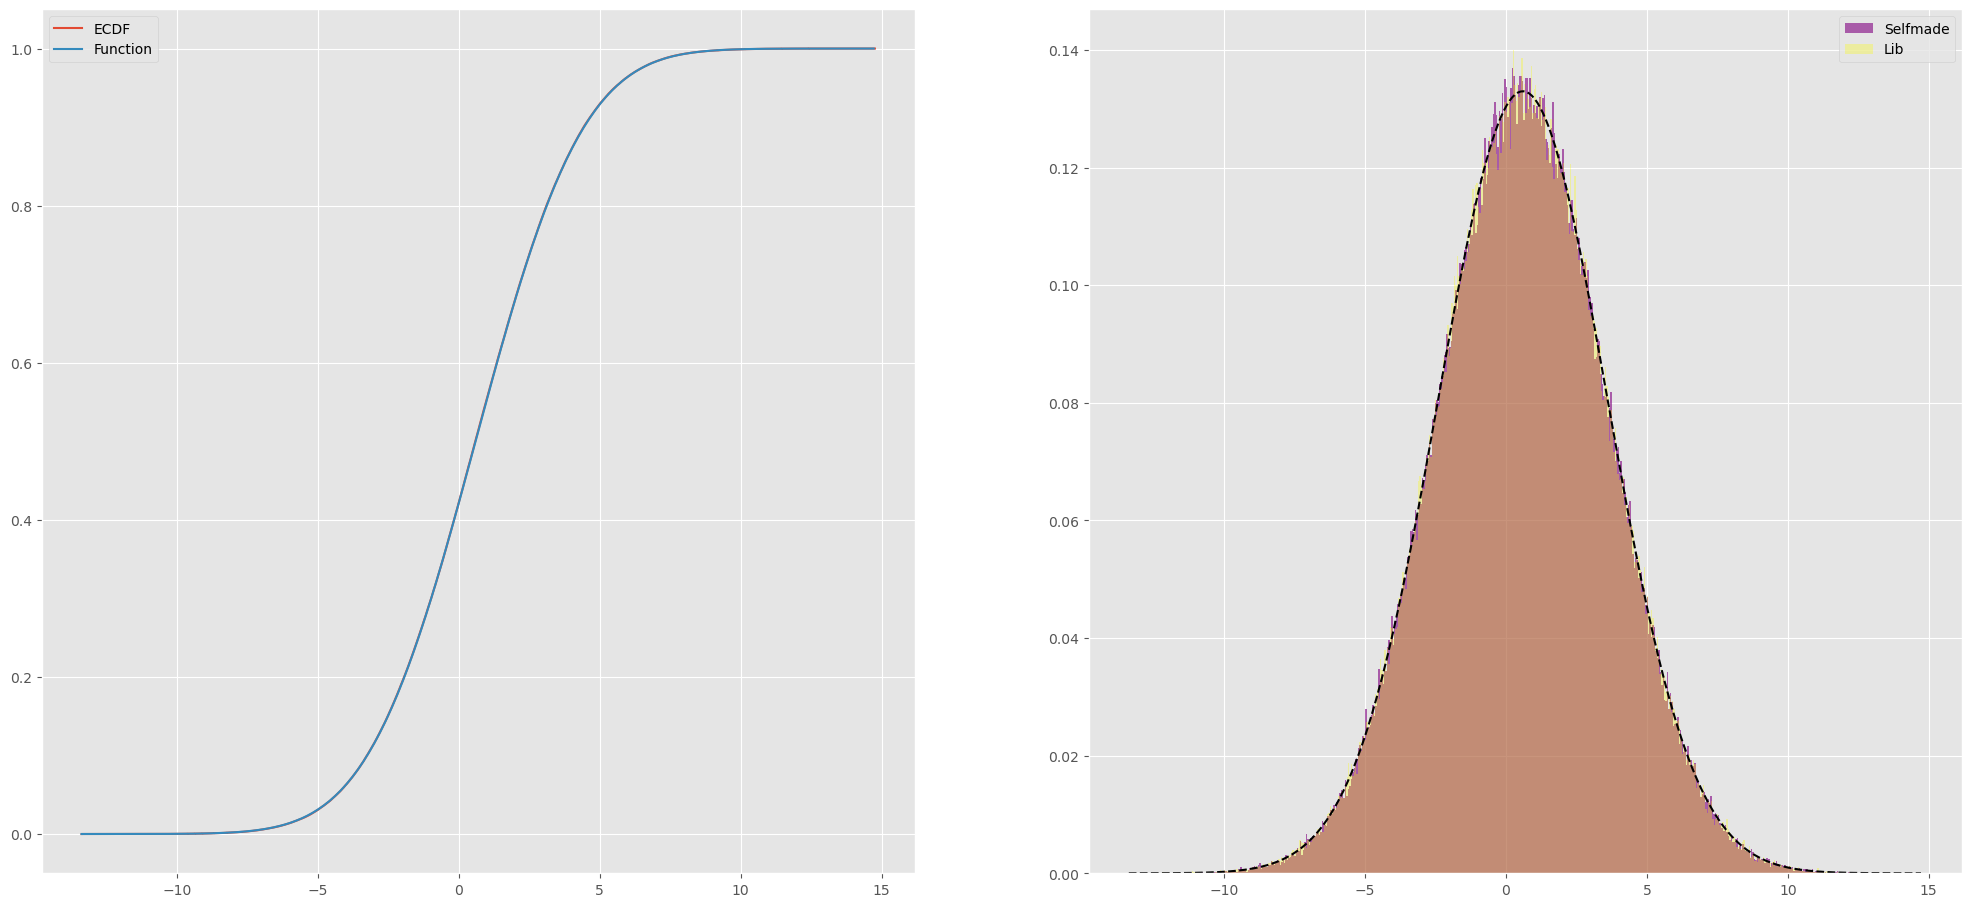

In [22]:
#б) генератор N(a, b^2) на основе N(0, 1)
def general_normal_random(a, b):
    x = normal_random()
    x = a + b**0.5 * x
    return x

n = int(input("Количество элементов в выборке: "))
a = float(input("Математическое ожидание: "))
b = float(input("Дисперсия: "))

plt.subplots_adjust(top=2.8, bottom=1, left=1, right=4)

plt.subplot(1, 2, 1)

X = [general_normal_random(a, b) for i in range(n)]
ecdf = ECDF(X)
plt.step(ecdf.x, ecdf.y, label="ECDF")

coor = np.arange(min(X), max(X), 0.1)
plt.plot(coor, sc.stats.norm.cdf(coor, a, b**0.5), label='Function')

plt.legend(loc="best")

plt.subplot(1, 2, 2)
plt.hist(X, density=True, color='purple', bins=int(n**0.5), alpha=0.6, label="Selfmade")

Z = np.random.normal(a, b**0.5, n)
plt.hist(Z, density=True, color='yellow', bins=int(n**0.5), alpha=0.3, label="Lib")

plt.plot(coor, sc.stats.norm.pdf(coor, a, b**0.5), '--', color='black')

plt.legend(loc="best")